<a href="https://colab.research.google.com/github/SabilarRosyad/PCVK_GENAP_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


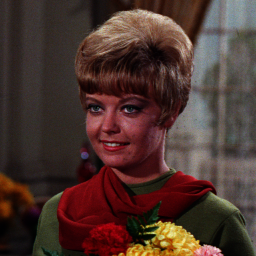

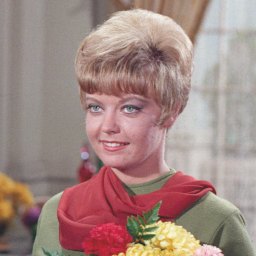

In [12]:
import cv2
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')

# Meminta pengguna untuk memasukkan nilai Gamma
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    exit()

# Load citra
original = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Menghitung Gamma Correction
gamma_correction = 255 * (original / 255) ** (1 / gamma)

# Mendapatkan citra hasil Gamma Correction
gamma_corrected_image = np.uint8(gamma_correction)

# Menampilkan citra asli dan hasil Gamma Correction
cv2_imshow(original)
cv2_imshow(gamma_corrected_image)

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.

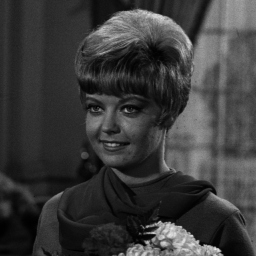

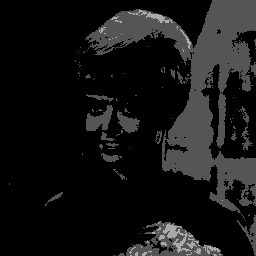

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

bit_depth = 2  # Ubah sesuai dengan bit depth yang diinginkan
level = 255 / (pow(2, bit_depth) - 1)

# Load citra
original = cv2.imread('/content/drive/MyDrive/PCVK/Images (1)/female.tiff', cv2.IMREAD_GRAYSCALE)

# Membuat citra dengan depth sesuai bit depth
depth_image = np.zeros(original.shape, original.dtype)

# Melakukan kuantisasi
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = int((original[i, j] // level) * level)

# Menampilkan citra asli dan citra hasil kuantisasi
cv2_imshow(original)
cv2_imshow(depth_image)


3. **Buat modul Average Denoising**

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /Images (1)/1.jpg
100 Citra dengan Gaussian Noise sudah disediakan pada /Images (1)/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images (1)/noises/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)
Dengan menggunakan code diatas, anda tinggal memanggil image difolder tersebut
menggunakan cv_img[0], cv_img[1], dst.

PSNR 10: 22.828812922404104
PSNR 20: 23.039085678579106
PSNR 40: 23.360139010975686
PSNR 80: 23.29495394268942
PSNR 100: 23.28332752276434


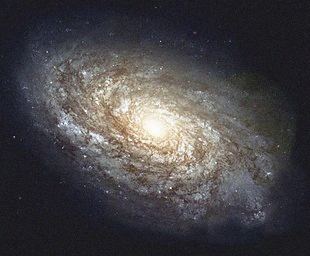

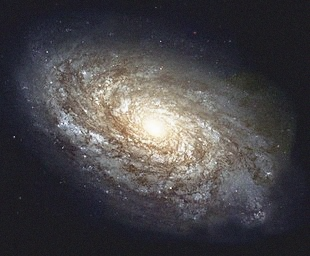

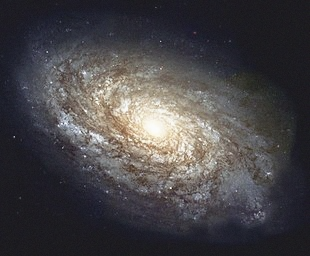

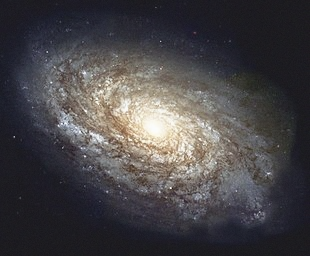

In [27]:
import cv2
import numpy as np
import glob



def average_denoising(images):
    total_images = len(images)
    height, width, _ = images[0].shape
    denoised_image = np.zeros((height, width, 3), dtype=np.float32)

    # Accumulate pixel values for each position
    for img in images:
        denoised_image += img.astype(np.float32)

    # Compute the average
    denoised_image /= total_images

    # Convert back to uint8
    denoised_image = denoised_image.astype(np.uint8)

    return denoised_image

original_image = cv2.imread('/content/drive/MyDrive/PCVK/Images (1)/noises/1.jpg')

#10
num_images_to_process = 10
noisy_images = []
for i, img in enumerate(glob.glob('/content/drive/MyDrive/PCVK/Images (1)/noises/*.jpg')):
    if i == num_images_to_process:
        break
    n = cv2.imread(img)
    noisy_images.append(n)

# Perform average denoising
denoised_image10 = average_denoising(noisy_images)

# Hitung PSNR antara citra asli dan citra hasil denoising
psnr_value = cv2.PSNR(original_image, denoised_image10)

# Tampilkan nilai PSNR
print('PSNR 10:', psnr_value)

#20
num_images_to_process = 20
noisy_images = []
for i, img in enumerate(glob.glob('/content/drive/MyDrive/PCVK/Images (1)/noises/*.jpg')):
    if i == num_images_to_process:
        break
    n = cv2.imread(img)
    noisy_images.append(n)

# Perform average denoising
denoised_image20 = average_denoising(noisy_images)

# Hitung PSNR antara citra asli dan citra hasil denoising
psnr_value = cv2.PSNR(original_image, denoised_image20)

# Tampilkan nilai PSNR
print('PSNR 20:', psnr_value)

#40
num_images_to_process = 40
noisy_images = []
for i, img in enumerate(glob.glob('/content/drive/MyDrive/PCVK/Images (1)/noises/*.jpg')):
    if i == num_images_to_process:
        break
    n = cv2.imread(img)
    noisy_images.append(n)

# Perform average denoising
denoised_image40 = average_denoising(noisy_images)

# Hitung PSNR antara citra asli dan citra hasil denoising
psnr_value = cv2.PSNR(original_image, denoised_image40)

# Tampilkan nilai PSNR
print('PSNR 40:', psnr_value)

#80
num_images_to_process = 80
noisy_images = []
for i, img in enumerate(glob.glob('/content/drive/MyDrive/PCVK/Images (1)/noises/*.jpg')):
    if i == num_images_to_process:
        break
    n = cv2.imread(img)
    noisy_images.append(n)

# Perform average denoising
denoised_image80 = average_denoising(noisy_images)

# Hitung PSNR antara citra asli dan citra hasil denoising
psnr_value = cv2.PSNR(original_image, denoised_image80)

# Tampilkan nilai PSNR
print('PSNR 80:', psnr_value)

#100
# Load a specific number of noisy images (e.g., 10 images)
num_images_to_process = 100
noisy_images = []
for i, img in enumerate(glob.glob('/content/drive/MyDrive/PCVK/Images (1)/noises/*.jpg')):
    if i == num_images_to_process:
        break
    n = cv2.imread(img)
    noisy_images.append(n)

# Perform average denoising
denoised_image100 = average_denoising(noisy_images)

# Hitung PSNR antara citra asli dan citra hasil denoising
psnr_value = cv2.PSNR(original_image, denoised_image100)

# Tampilkan nilai PSNR
print('PSNR 100:', psnr_value)


# Tampilkan hasil denoise
cv2_imshow(denoised_image20)
cv2_imshow(denoised_image40)
cv2_imshow(denoised_image80)
cv2_imshow(denoised_image100)


4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

(256, 256, 3)


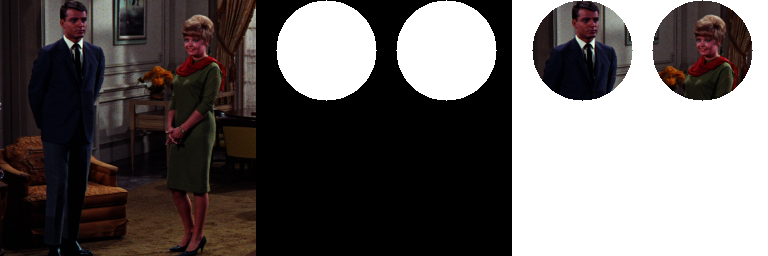

In [36]:
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/Images (1)/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

print(img.shape)
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

## **NOT**

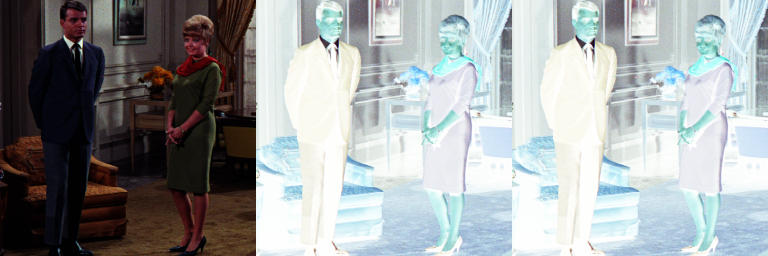

In [40]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra asli
original_image_path = '/content/drive/MyDrive/PCVK/Images (1)/couple.tiff'
original_image = cv2.imread(original_image_path)

# Inisialisasi citra mask dengan latar belakang hitam
mask = np.zeros_like(original_image)

# Tentukan parameter untuk lingkaran 1
center1 = (160, 125)
radius1 = 120
color1 = (255, 255, 255)  # Warna putih

# Tentukan parameter untuk lingkaran 2
center2 = (450, 125)
radius2 = 120
color2 = (255, 255, 255)  # Warna putih

# Gambar dua lingkaran pada citra mask
cv2.circle(mask, center1, radius1, color1, -1)  # -1 mengisi lingkaran
cv2.circle(mask, center2, radius2, color2, -1)  # -1 mengisi lingkaran

# Lakukan masking pada citra asli menggunakan citra mask
masked_image = cv2.bitwise_not(original_image, mask)

# Menampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
combined_images = np.hstack((original_image, mask, masked_image))

# Tampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
cv2_imshow(combined_images)


## **OR**

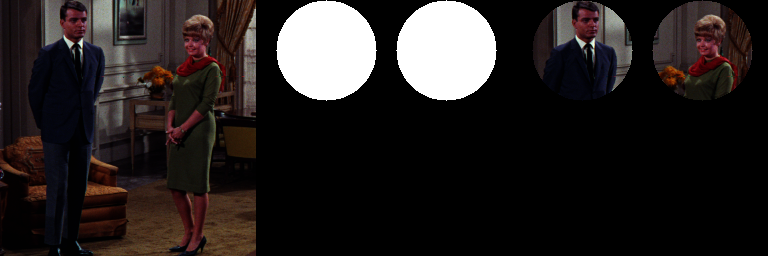

In [39]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra asli
original_image_path = '/content/drive/MyDrive/PCVK/Images (1)/couple.tiff'
original_image = cv2.imread(original_image_path)

# Inisialisasi citra mask dengan latar belakang hitam
mask = np.zeros_like(original_image)

# Tentukan parameter untuk lingkaran 1
center1 = (70, 50)
radius1 = 50
color1 = (255, 255, 255)  # Warna putih

# Tentukan parameter untuk lingkaran 2
center2 = (190, 50)
radius2 = 50
color2 = (255, 255, 255)  # Warna putih

# Gambar dua lingkaran pada citra mask
cv2.circle(mask, center1, radius1, color1, -1)  # -1 mengisi lingkaran
cv2.circle(mask, center2, radius2, color2, -1)  # -1 mengisi lingkaran

# Lakukan masking pada citra asli menggunakan citra mask
masked_image = cv2.bitwise_and(original_image, mask)

# Menampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
combined_images = np.hstack((original_image, mask, masked_image))

# Tampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
cv2_imshow(combined_images)


## **AND**

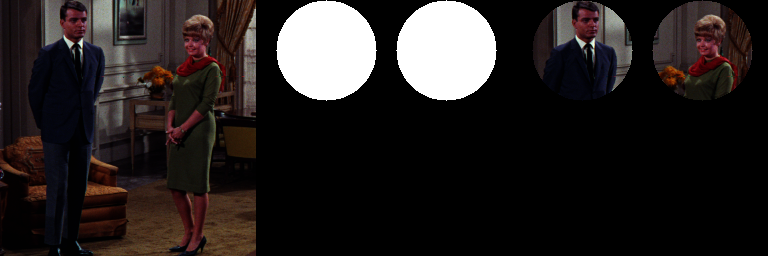

In [42]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra asli
original_image_path = '/content/drive/MyDrive/PCVK/Images (1)/couple.tiff'
original_image = cv2.imread(original_image_path)

# Inisialisasi citra mask dengan latar belakang hitam
mask = np.zeros_like(original_image)

# Tentukan parameter untuk lingkaran 1
center1 = (70, 50)
radius1 = 50
color1 = (255, 255, 255)  # Warna putih

# Tentukan parameter untuk lingkaran 2
center2 = (190, 50)
radius2 = 50
color2 = (255, 255, 255)  # Warna putih

# Gambar dua lingkaran pada citra mask
cv2.circle(mask, center1, radius1, color1, -1)  # -1 mengisi lingkaran
cv2.circle(mask, center2, radius2, color2, -1)  # -1 mengisi lingkaran

# Lakukan masking pada citra asli menggunakan citra mask
masked_image = cv2.bitwise_and(original_image, mask)

# Menampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
combined_images = np.hstack((original_image, mask, masked_image))

# Tampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
cv2_imshow(combined_images)


## **NAND**

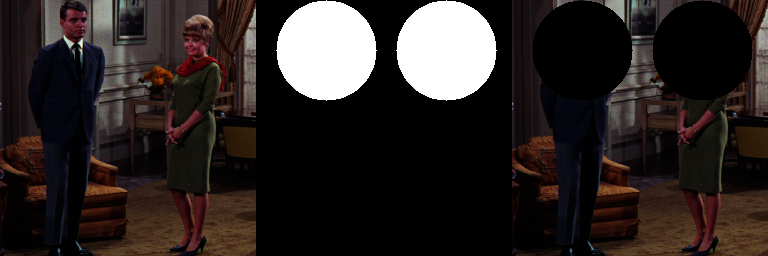

In [44]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra asli
original_image_path = '/content/drive/MyDrive/PCVK/Images (1)/couple.tiff'
original_image = cv2.imread(original_image_path)

# Inisialisasi citra mask dengan latar belakang hitam
mask = np.zeros_like(original_image)

# Tentukan parameter untuk lingkaran 1
center1 = (70, 50)
radius1 = 50
color1 = (255, 255, 255)  # Warna putih

# Tentukan parameter untuk lingkaran 2
center2 = (190, 50)
radius2 = 50
color2 = (255, 255, 255)  # Warna putih

# Gambar dua lingkaran pada citra mask
cv2.circle(mask, center1, radius1, color1, -1)  # -1 mengisi lingkaran
cv2.circle(mask, center2, radius2, color2, -1)  # -1 mengisi lingkaran

# Invert citra mask
inverted_mask = cv2.bitwise_not(mask)

# Lakukan masking pada citra asli untuk area di sekitarnya
surrounding_area = cv2.bitwise_and(original_image, inverted_mask)

# Gabungkan citra asli, citra mask, area di sekitarnya, dan hasil masking secara horizontal
combined_image = np.hstack((original_image, mask, surrounding_area))

# Tampilkan hasil secara bersebelahan
cv2_imshow(combined_image)


## **XOR**

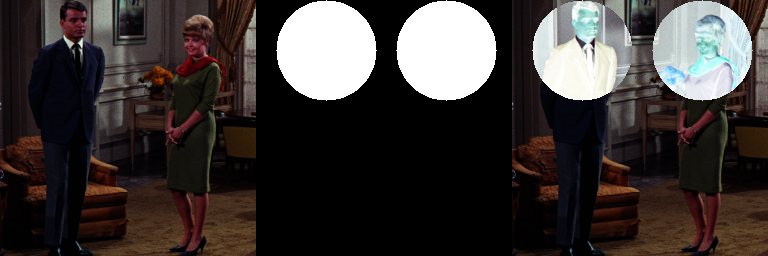

In [46]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra asli
original_image_path = '/content/drive/MyDrive/PCVK/Images (1)/couple.tiff'
original_image = cv2.imread(original_image_path)

# Inisialisasi citra mask dengan latar belakang hitam
mask = np.zeros_like(original_image)

# Tentukan parameter untuk lingkaran 1
center1 = (70, 50)
radius1 = 50
color1 = (255, 255, 255)  # Warna putih

# Tentukan parameter untuk lingkaran 2
center2 = (190, 50)
radius2 = 50
color2 = (255, 255, 255)  # Warna putih

# Gambar dua lingkaran pada citra mask
cv2.circle(mask, center1, radius1, color1, -1)  # -1 mengisi lingkaran
cv2.circle(mask, center2, radius2, color2, -1)  # -1 mengisi lingkaran

# Lakukan masking pada citra asli menggunakan citra mask
masked_image = cv2.bitwise_xor(original_image, mask)

# Menampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
combined_images = np.hstack((original_image, mask, masked_image))

# Tampilkan citra asli, citra mask, dan hasil masking secara bersebelahan
cv2_imshow(combined_images)


Tugas Kelompok
